In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
arr2= np.load('data_array_formatted.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[0.003947365799861489 0.027369683484445913 0.1383737517831669 ... 0 0 0]
 [0.021052629002770076 0.05163376910306254 0.14122681883024252 ... 0 1 0]
 [0.003947365799861489 0.004640614264768108 0.19115549215406563 ... 1 0 0]
 ...
 [0.05263157645429362 0.013200240283036896 0.16690442225392296 ... 1 0 0]
 [0.09210526076869806 0.04963356512358402 0.19543509272467904 ... 1 0 0]
 [0.001973681584141267 0.012877102478217349 0.11269614835948645 ... 0 1 0]] ['Average' 'Average' 'Average' ... 'Average' 'Average' 'Average']
5253 5253 1314 1314


# Decision Tree

Best parameters set found on development set:
 {'max_leaf_nodes': 70, 'min_samples_split': 5}

 Best Score 0.48069568121938844

 Grid scores on development set:
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 5}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 10}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 15}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 20}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 25}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 30}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 35}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 40}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 45}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 50}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 55}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 60}
0.365 (+/-0.011) for {'m

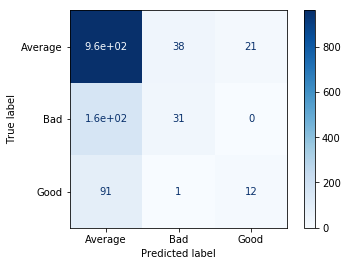

In [3]:
from sklearn.tree import DecisionTreeClassifier #import the DT classifier


tuned_parameters = [{'min_samples_split': [i for i in range(5,80,5)], 'max_leaf_nodes':  [k for k in range(5,80,5)]}]

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [4]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.4280647  0.44658996 0.41693414 0.45831864 0.46751312]


### K best Data

In [5]:
#Load Kbest data
arr2= np.load('data_kBest.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]] ['Average' 'Average' 'Average' ... 'Average' 'Average' 'Average']
5253 5253 1314 1314


Best parameters set found on development set:
 {'max_leaf_nodes': 5, 'min_samples_split': 5}

 Best Score 0.2956134973458004

 Grid scores on development set:
0.296 (+/-0.000) for {'max_leaf_nodes': 5, 'min_samples_split': 5}
0.296 (+/-0.000) for {'max_leaf_nodes': 5, 'min_samples_split': 10}
0.296 (+/-0.000) for {'max_leaf_nodes': 5, 'min_samples_split': 15}
0.296 (+/-0.000) for {'max_leaf_nodes': 5, 'min_samples_split': 20}
0.296 (+/-0.000) for {'max_leaf_nodes': 5, 'min_samples_split': 25}
0.296 (+/-0.000) for {'max_leaf_nodes': 5, 'min_samples_split': 30}
0.296 (+/-0.000) for {'max_leaf_nodes': 5, 'min_samples_split': 35}
0.296 (+/-0.000) for {'max_leaf_nodes': 5, 'min_samples_split': 40}
0.296 (+/-0.000) for {'max_leaf_nodes': 5, 'min_samples_split': 45}
0.296 (+/-0.000) for {'max_leaf_nodes': 5, 'min_samples_split': 50}
0.296 (+/-0.000) for {'max_leaf_nodes': 5, 'min_samples_split': 55}
0.296 (+/-0.000) for {'max_leaf_nodes': 5, 'min_samples_split': 60}
0.296 (+/-0.000) for {'max

C:\Users\Tasli\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


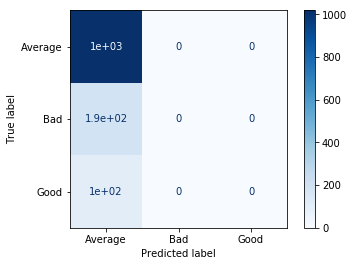

In [6]:
from sklearn.tree import DecisionTreeClassifier #import the DT classifier


tuned_parameters = [{'min_samples_split': [i for i in range(5,80,5)], 'max_leaf_nodes':  [k for k in range(5,80,5)]}]

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [7]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.29469214 0.29469214 0.29481733 0.29481733 0.2946593 ]


### K select Percentile

In [8]:
#Load Kbest data
arr2= np.load('data_select_percentile.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[0.003947365799861489 0.027369683484445913 0.1383737517831669 0 0]
 [0.021052629002770076 0.05163376910306254 0.14122681883024252 0 1]
 [0.003947365799861489 0.004640614264768108 0.19115549215406563 1 0]
 ...
 [0.05263157645429362 0.013200240283036896 0.16690442225392296 1 0]
 [0.09210526076869806 0.04963356512358402 0.19543509272467904 1 0]
 [0.001973681584141267 0.012877102478217349 0.11269614835948645 0 1]] ['Average' 'Average' 'Average' ... 'Average' 'Average' 'Average']
5253 5253 1314 1314


Best parameters set found on development set:
 {'max_leaf_nodes': 65, 'min_samples_split': 15}

 Best Score 0.47958768969351695

 Grid scores on development set:
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 5}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 10}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 15}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 20}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 25}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 30}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 35}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 40}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 45}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 50}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 55}
0.365 (+/-0.011) for {'max_leaf_nodes': 5, 'min_samples_split': 60}
0.365 (+/-0.011) for {'

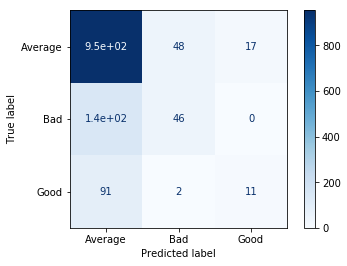

In [9]:
from sklearn.tree import DecisionTreeClassifier #import the DT classifier


tuned_parameters = [{'min_samples_split': [i for i in range(5,80,5)], 'max_leaf_nodes':  [k for k in range(5,80,5)]}]

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [10]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.42334395 0.42838581 0.45691142 0.45611822 0.4646025 ]


### PCA

In [11]:
#Load Kbest data
arr2= np.load('data_pca.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[-0.2668990480532727 0.7955195541058508 -0.31189174404518605
  -0.06279000616091403]
 [-0.11249211937670339 0.11386167290926646 0.7960057304498621
  -0.566522736475527]
 [0.7533508178888383 -0.16531012330588044 -0.13103281872338923
  -0.029475859314786697]
 ...
 [0.7521852812229466 -0.16344152965792963 -0.13094237177940624
  -0.025483097537655243]
 [0.7517777704386579 -0.1613423366153525 -0.13139539788714713
  -0.020865925132946238]
 [-0.11242004274209731 0.11253824516972548 0.7963608411917731
  -0.5693779640319709]] ['Average' 'Average' 'Average' ... 'Average' 'Average' 'Average']
5253 5253 1314 1314


Best parameters set found on development set:
 {'max_leaf_nodes': 70, 'min_samples_split': 65}

 Best Score 0.4142166511190021

 Grid scores on development set:
0.329 (+/-0.028) for {'max_leaf_nodes': 5, 'min_samples_split': 5}
0.329 (+/-0.028) for {'max_leaf_nodes': 5, 'min_samples_split': 10}
0.329 (+/-0.028) for {'max_leaf_nodes': 5, 'min_samples_split': 15}
0.329 (+/-0.028) for {'max_leaf_nodes': 5, 'min_samples_split': 20}
0.329 (+/-0.028) for {'max_leaf_nodes': 5, 'min_samples_split': 25}
0.329 (+/-0.028) for {'max_leaf_nodes': 5, 'min_samples_split': 30}
0.329 (+/-0.028) for {'max_leaf_nodes': 5, 'min_samples_split': 35}
0.329 (+/-0.028) for {'max_leaf_nodes': 5, 'min_samples_split': 40}
0.329 (+/-0.028) for {'max_leaf_nodes': 5, 'min_samples_split': 45}
0.329 (+/-0.028) for {'max_leaf_nodes': 5, 'min_samples_split': 50}
0.329 (+/-0.028) for {'max_leaf_nodes': 5, 'min_samples_split': 55}
0.329 (+/-0.028) for {'max_leaf_nodes': 5, 'min_samples_split': 60}
0.329 (+/-0.028) for {'m

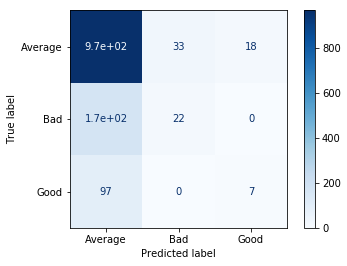

In [12]:
from sklearn.tree import DecisionTreeClassifier #import the DT classifier


tuned_parameters = [{'min_samples_split': [i for i in range(5,80,5)], 'max_leaf_nodes':  [k for k in range(5,80,5)]}]

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [13]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.35933224 0.38474518 0.40045574 0.41091419 0.37928828]
